In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Analysis of stat

In [30]:
stat_df = pd.read_csv('../result/experiments_1_2/stat_mle_RQ.csv')
stat_df

,quantile,model,method,trial,loss,hit_rate_in,hit_rate_out,dq_in,dq_out,binom_in,binom_out,traffic_in,traffic_out,kupiec_in,kupiec_out,independent_in,independent_out
0,0.05,adaptive,numeric,0,0.128174,0.048515,0.044956,0.618034,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971
1,0.05,adaptive,numeric,1,0.128174,0.048515,0.044956,0.618023,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971
2,0.05,adaptive,numeric,2,0.128174,0.048515,0.044956,0.618006,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971
3,0.05,adaptive,numeric,3,0.128174,0.048515,0.044956,0.618006,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971
4,0.05,adaptive,numeric,4,0.128174,0.048515,0.044956,0.617985,0.998807,0.708729,0.360765,green,green,1.0,1.0,0.507619,0.960971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.01,igarch,mle,25,0.034216,0.010339,0.013706,1.000000,0.999996,0.805834,0.123899,green,green,1.0,1.0,0.992732,0.646889
476,0.01,igarch,mle,26,0.034215,0.010339,0.013158,1.000000,0.992330,0.805834,0.192984,green,green,1.0,1.0,0.992732,0.676898
477,0.01,igarch,mle,27,0.034215,0.010339,0.012610,1.000000,0.993753,0.805834,0.239711,green,green,1.0,1.0,0.992732,0.705731
478,0.01,igarch,mle,28,0.034216,0.010339,0.013706,1.000000,0.999996,0.805834,0.123899,green,green,1.0,1.0,0.992732,0.646889


In [45]:
stat_to_csv_df = {
    'model': [],
    'quantile': [],
    'loss': [],
    'mle\'s loss': [],
    'numeric\'s loss': [],
    'hit_rate_in': [],
    'mle\'s hit_rate_in': [],
    'numeric\'s hit_rate_in': [],
    'hit_rate_out': [],
    'mle\'s hit_rate_out': [],
    'numeric\'s hit_rate_out': [],
}

keys = [key for key in stat_to_csv_df][2:]

for q in stat_df['quantile'].unique():
    for mod in stat_df['model'].unique():
        cond1 = stat_df['quantile']==q
        cond2 = stat_df['model']==mod
        
        stat_to_csv_df['model'].append(mod)
        stat_to_csv_df['quantile'].append(q)
        
        for i, metric in enumerate(stat_df.columns[4:7]):
            try:
                x = stat_df[(stat_df['method']=='mle')&cond1&cond2][metric]
                y = stat_df[(stat_df['method']=='numeric')&cond1&cond2][metric]
    #             x = stat_df[(stat_df['method']=='mle')&(stat_df['best_start']==False)&cond1&cond2][metric]
    #             y = stat_df[(stat_df['method']=='numeric')&(stat_df['best_start']==False)&cond1&cond2][metric]
                if metric=='loss':
                    print('loss:', x.mean() < y.mean())
                if metric=='hit_rate_in':
                    print('hit_rate_in:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                if metric=='hit_rate_out':
                    print('hit_rate_out:', abs(0.05 - x.mean()) < abs(0.05 - y.mean()))
                stat_to_csv_df[keys[i*3]].append('accepted' if mannwhitneyu(x, y)[1] > 0.05 else 'rejected')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))
            except:
                # they are exactly the same 
                stat_to_csv_df[keys[i*3]].append('accepted')
                stat_to_csv_df[keys[i*3+1]].append(np.round(x.mean(), 6))
                stat_to_csv_df[keys[i*3+2]].append(np.round(y.mean(), 6))

loss: False
hit_rate_in: True
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: False
std: 0.0
std: 0.0
loss: False
hit_rate_in: True
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: True
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: False
loss: False
hit_rate_in: False
hit_rate_out: False


In [55]:
pd.DataFrame(stat_to_csv_df).T.to_csv('../result/experiments_1_2/stat_mle_RQ_analysis_res.csv')

# Analysis of beta

In [67]:
beta_df = pd.read_csv('../result/experiments_1_2/beta_mle_RQ.csv')
beta_df

,beta,coefficient,S.E. of beta,pval of beta,quantile,model,method,trial
0,beta1,-0.655107,0.041220,3.540696e-57,0.05,adaptive,numeric,0
1,beta1,-0.655127,0.041243,4.044742e-57,0.05,adaptive,numeric,1
2,beta1,-0.655156,0.041276,4.917020e-57,0.05,adaptive,numeric,2
3,beta1,-0.655156,0.041277,4.924863e-57,0.05,adaptive,numeric,3
4,beta1,-0.655193,0.041319,6.301294e-57,0.05,adaptive,numeric,4
...,...,...,...,...,...,...,...,...
1315,beta2,0.887764,0.027544,3.273749e-228,0.01,igarch,mle,28
1316,beta3,0.510932,0.183023,2.622130e-03,0.01,igarch,mle,28
1317,beta1,0.274409,0.087304,8.357423e-04,0.01,igarch,mle,29
1318,beta2,0.876903,0.047728,1.081357e-75,0.01,igarch,mle,29


array(['beta1', 'beta2', 'beta3', 'beta4'], dtype=object)

beta1 0.045245180453072


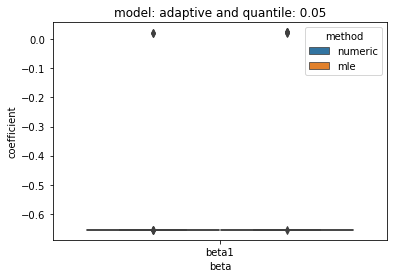

beta1 0.15915211373611382


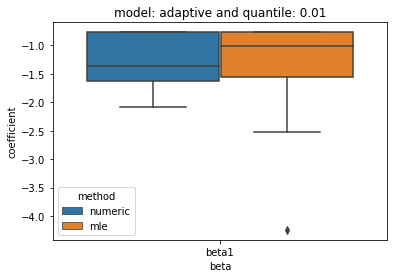

beta1 0.045245180453072
beta2 0.42669086837739656
beta3 0.41512764195559815


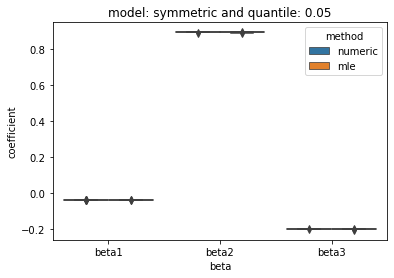

beta1 0.15915211373611382
beta2 0.3367475264008015
beta3 0.4036374753644574


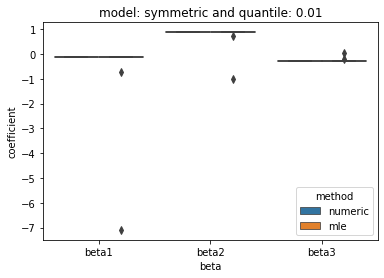

beta1 0.045245180453072
beta2 0.42669086837739656
beta3 0.41512764195559815
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


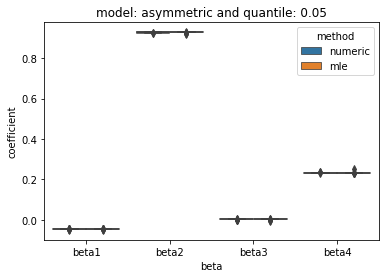

beta1 0.15915211373611382
beta2 0.3367475264008015
beta3 0.4036374753644574
beta4 0.0


G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:7028: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd


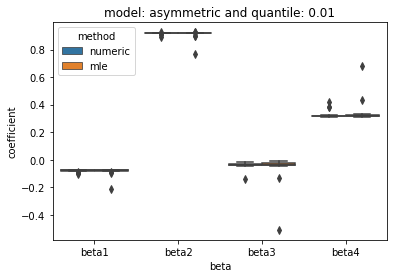

beta1 0.045245180453072
beta2 0.42669086837739656
beta3 0.41512764195559815


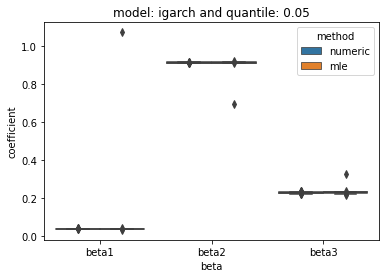

beta1 0.15915211373611382
beta2 0.3367475264008015
beta3 0.4036374753644574


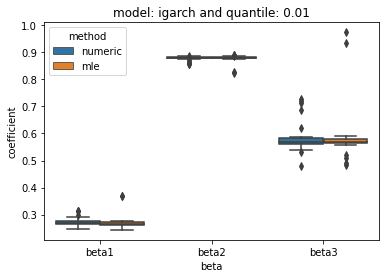

In [72]:
for model in beta_df.model.unique():
    for q in beta_df['quantile'].unique():
        plt.figure()
        sns.boxplot(
            data=beta_df[(beta_df['model']==model)&(beta_df['quantile']==q)],
            x='beta',
            y='coefficient',
            hue='method'
        )
        cond1 = beta_df['quantile']==q
        cond2 = beta_df['model']==mod
        plt.title(f'model: {model} and quantile: {q}')
        for beta in beta_df[beta_df['model']==model].beta.unique():
            cond3 = beta_df['beta']==beta
            x = beta_df[(beta_df['method']=='mle')&cond1&cond2&cond3]['coefficient']
            y = beta_df[(beta_df['method']=='numeric')&cond1&cond2&cond3]['coefficient']
            print(beta, mannwhitneyu(x, y)[1])        
        plt.show()

In [56]:
beta_df.groupby(
    ['model','quantile','beta','method']
).mean()

coefficient  S.E. of beta   pval of beta  \
model      quantile beta  method                                              
adaptive   0.01     beta1 mle        -1.268980      0.088366   2.910770e-11   
                          numeric    -1.306247      0.077366   2.329901e-11   
           0.05     beta1 mle        -0.542116      0.034507   7.477744e-12   
                          numeric    -0.610099      0.038721   9.035206e-08   
asymmetric 0.01     beta1 mle        -0.082001      0.013245   1.474906e-06   
                          numeric    -0.077498      0.012323   8.177990e-06   
                    beta2 mle         0.914621      0.011865   2.763296e-29   
                          numeric     0.919018      0.011027  4.184197e-124   
                    beta3 mle        -0.051586      0.061740   2.635403e-01   
                          numeric    -0.038000      0.056480   2.592285e-01   
                    beta4 mle         0.334286      0.046880   6.213962e-04   
                          numeric     0.324960      0.043749   3.823406e-04   
           0.05     beta1 mle        -0.045810      0.010086   1.123068e-04   
                          numeric    -0.045780      0.009861   1.804008e-06   
                    beta2 mle         0.926106      0.022595   0.000000e+00   
                          numeric     0.926216      0.022909   0.000000e+00   
                    beta3 mle         0.002936      0.050945   4.729016e-01   
                          numeric     0.003101      0.051494   4.751809e-01   
                    beta4 mle         0.232012      0.068696   4.565649e-04   
                          numeric     0.231688      0.070189   4.862984e-04   
igarch     0.01     beta1 mle         0.271212      0.089760   1.384009e-03   
                          numeric     0.272645      0.090626   1.477690e-03   
                    beta2 mle         0.877176      0.034246   7.085701e-41   
                          numeric     0.877405      0.037214   6.930595e-33   
                    beta3 mle         0.588015      0.258000   1.646992e-02   
                          numeric     0.584280      0.281365   2.596610e-02   
           0.05     beta1 mle         0.074522      0.031742   4.608219e-02   
                          numeric     0.040581      0.024618   4.971227e-02   
                    beta2 mle         0.908330      0.015764   2.990560e-31   
                          numeric     0.915174      0.014833   0.000000e+00   
                    beta3 mle         0.233389      0.034275   1.939051e-05   
                          numeric     0.231114      0.033764   9.323513e-07   
symmetric  0.01     beta1 mle        -0.369954      0.040842   1.676499e-05   
                          numeric    -0.116499      0.023694   4.472770e-07   
                    beta2 mle         0.810389      0.015477   4.439784e-25   
                          numeric     0.878439      0.013292   0.000000e+00   
                    beta3 mle        -0.260909      0.025898   3.661199e-03   
                          numeric    -0.272716      0.024940   1.628930e-27   
           0.05     beta1 mle        -0.037394      0.045091   2.020336e-01   
                          numeric    -0.037353      0.046204   2.094102e-01   
                    beta2 mle         0.894360      0.054528   9.898769e-58   
                          numeric     0.894354      0.055786   4.406641e-55   
                    beta3 mle        -0.200176      0.070988   2.525956e-03   
                          numeric    -0.200235      0.072381   2.843225e-03   

                                   trial  
model      quantile beta  method          
adaptive   0.01     beta1 mle       14.5  
                          numeric   14.5  
           0.05     beta1 mle       14.5  
                          numeric   14.5  
asymmetric 0.01     beta1 mle       14.5  
                          numeric   14.5  
                    beta2 mle       14.5  
             